# Modelisation of luminosity and flux bias

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022-04-22
- update : 2022-04-22


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline, interp1d
from scipy.special import erfc
import pandas as pd
import seaborn as sns 
import itertools
sns.set_style("white")
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
sns.set_palette(sns.color_palette(["#9b59b6", "#95a5a6", 
                                   "#e74c3c", "#3498db", 
                                   "#34495e", "#2ecc71"]))

In [3]:
# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.left': True,
          'figure.figsize': [18, 10],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

In [4]:
import scipy.special as sc

In [5]:
K = [-1 , -0.5, 0,1,2,3,4]
NK=len(K)

In [6]:
palette = itertools.cycle(sns.color_palette("hls", NK))

In [7]:
x=np.linspace(0,10.,50)

/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: invalid value encountered in multiply
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(-x)
/tmp/ipykernel_869/1309257024.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.exp((k-1)*np.log(x))*np.exp(

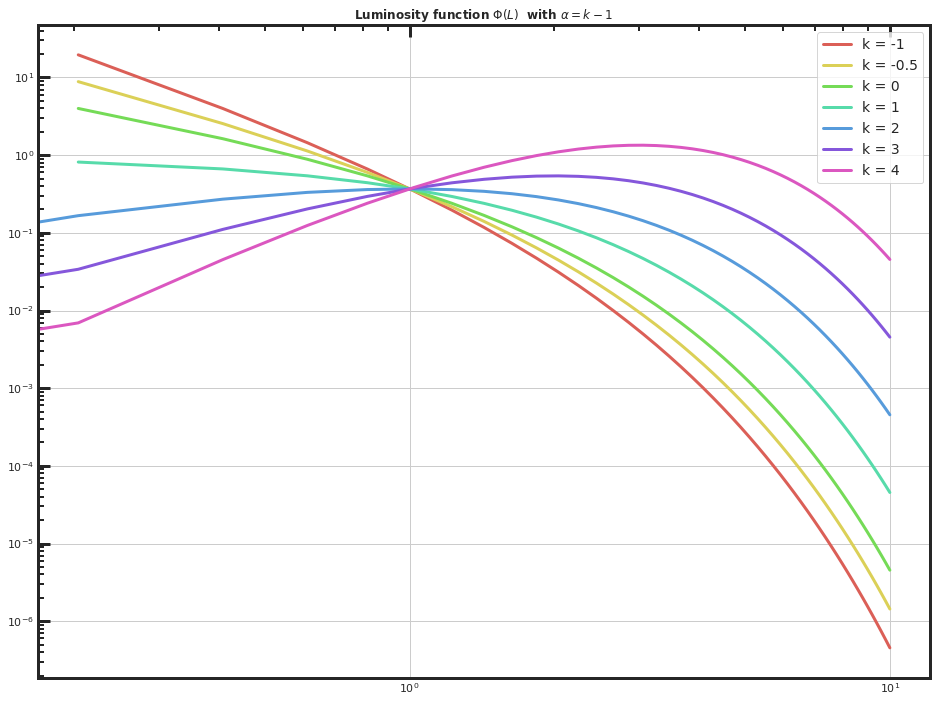

In [13]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    y=np.exp((k-1)*np.log(x))*np.exp(-x)
    ax.plot(x,y,color=next(palette),label="k = "+str(k))
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Luminosity function $\\Phi(L)$  with $\\alpha = k-1$",weight="bold")
ax.grid()

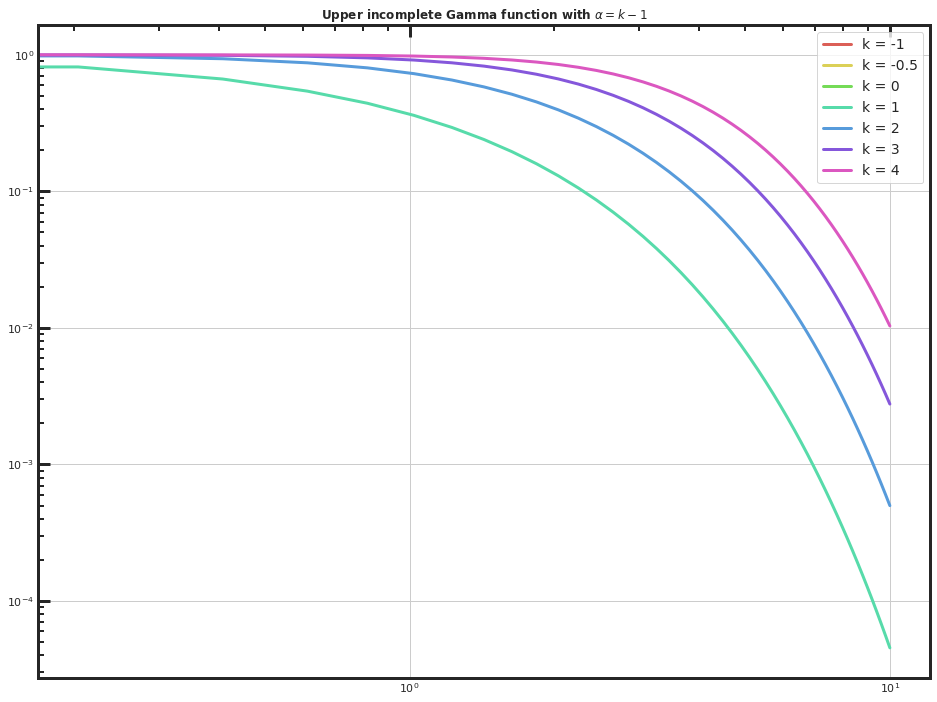

In [15]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    y=sc.gammaincc(k, x)
    ax.plot(x,y,color=next(palette),label="k = "+str(k))
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Upper incomplete Gamma function with $\\alpha = k-1$",weight="bold")
ax.grid()

# Bias

In [28]:
K0 = 0
xmin =np.logspace(-10,1)

In [29]:
def bias(x,k):
    """
    """
    
    bias = sc.gammaincc(k+1, x)/sc.gammaincc(k, x)/sc.gamma(k+1)*sc.gamma(k)
    return bias

/tmp/ipykernel_869/2349364824.py:5: RuntimeWarning: divide by zero encountered in true_divide
  bias = sc.gammaincc(k+1, x)/sc.gammaincc(k, x)/sc.gamma(k+1)*sc.gamma(k)


Text(0.5, 1.0, 'Bias vs detection threhold')

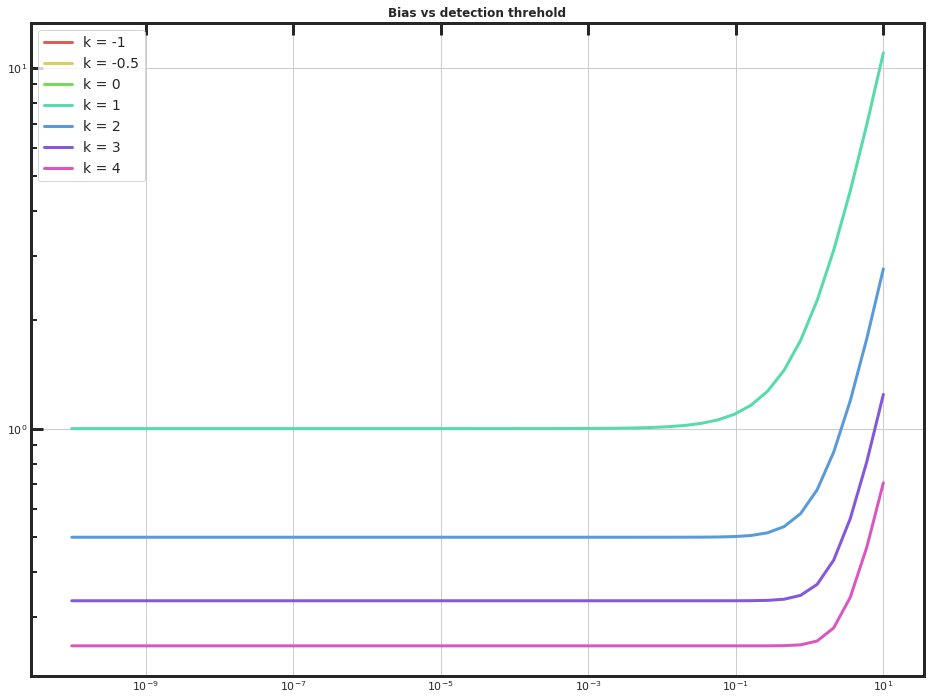

In [32]:
fig = plt.figure(figsize=(16,12))
ax=fig.add_subplot(1,1,1)
for k in K:
    ax.plot(xmin,bias(xmin,k),color=next(palette),label="k = "+str(k))
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
ax.grid()
ax.set_title("Bias vs detection threhold",weight="bold")